# Compte Rendu TP Deep Learning 1

## Section 1: Theoretical questions

### Question 1: 

#### 1.a) 

Time complexity is the amount of time taken by an algorithm to run, as a function of the length of the input. 

It measures the time taken to execute each statement of code in an algorithm.

In our case, the time complexity of the perceptron algorithm is: `O(m*n)`

#### 1.b) 

By definition, Space Complexity of an algorithm is the total space taken by the algorithm with respect to the input size. Space complexity includes both Auxiliary space and space used by input. 

Lets assume the size of the integer data type is 4 bytes. 
So, the total space occupied by the algorithm is `4*m*d + 4*m + 4*d + 4 + 4 bytes`. 

Therfore, the space complexity of perceptron algorithm is: `O(m*d)`

## Section 2: Libraries Installation 

In this lab, we used these different libraries in order to achieve the required tasks. 

In [8]:
# pip install numpy==1.21.3

In [9]:
# pip install matplotlib==3.4.3

In [10]:
# pip install sklearn==0.0

In [21]:
# pip install pandas==1.3.4

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Section 3: Perceptron Implementation 

In [105]:
def Perceptron(dataset):
    w = np.zeros(dataset.shape[1]-1)
    temp = np.zeros(dataset.shape[1]-1)
    for t in range(999999):
        for i in dataset:
            y = i[2]
            x = i[:2]
            if y*(np.dot(w,x))<=0:
                w = w + y*x
        if False not in (w==temp):
            return temp
        else:
            temp=w
    return w

## Section 4: Datasets generator

In [106]:
def Datagenerator(sigma1=1,sigma2=1,size=250):
    # The first 125 xi with label y=-1
    
    x11  = np.random.normal(loc=-1,scale=sigma1,size=(size//2,1))
    x12  = np.random.normal(size=(size//2,1))
    y1 = np.ones(shape=(size//2,1))*-1
    
    #The second 125 xi with label y=1
    
    x21  = np.random.normal(loc=1,scale=sigma2,size=(size//2,1))
    x22  = np.random.normal(size=(size//2,1))
    y2 = np.ones(shape=(size//2,1))
    
    #Data generation
    data = np.concatenate((np.concatenate((x11,x12,y1),axis=1),np.concatenate((x21,x22,y2),axis=1)),axis=0)
    np.random.shuffle(data)
    
    return data
    

In [107]:
data= Datagenerator(0.5,0.5)

In [108]:
data

array([[-1.21245968e+00,  5.91101194e-02, -1.00000000e+00],
       [ 1.30357118e+00,  2.80189253e-01,  1.00000000e+00],
       [-8.55092399e-01,  6.85781489e-02, -1.00000000e+00],
       [ 1.52936781e+00, -9.13241094e-01,  1.00000000e+00],
       [-1.37526266e+00, -1.62537332e-01, -1.00000000e+00],
       [ 3.99676197e-01, -5.93817211e-01,  1.00000000e+00],
       [-6.57913388e-01, -1.78994959e+00, -1.00000000e+00],
       [ 5.97415062e-01,  9.27978194e-01,  1.00000000e+00],
       [ 5.73311122e-01,  1.99941466e-02,  1.00000000e+00],
       [-8.14546505e-01,  8.89097981e-01, -1.00000000e+00],
       [-8.05751322e-01, -9.14007243e-01, -1.00000000e+00],
       [ 7.76310408e-01, -4.77854381e-01,  1.00000000e+00],
       [ 1.05444888e+00,  9.52576358e-03,  1.00000000e+00],
       [ 1.21205627e+00, -5.87447745e-01,  1.00000000e+00],
       [ 1.26776798e+00, -1.84787922e+00,  1.00000000e+00],
       [ 1.51187755e+00, -1.11793060e+00,  1.00000000e+00],
       [ 3.56571670e-01,  7.07837018e-01

In [136]:
def vis(data,t=[0,0]):
    scatter = plt.scatter(data[:,0],data[:,1],c=data[:,2])
    if (list(t)==[0,0])!=True:
        plt.plot(list(t))

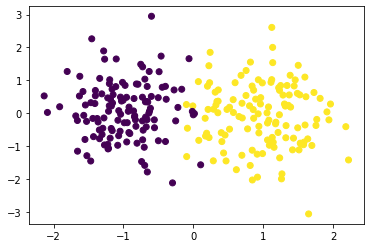

In [137]:
vis(data)

## Section 5: Split the dataset

In [111]:
def gen_train_split(sigma1=1,sigma2=1):
    data = Datagenerator(sigma1=sigma1,sigma2=sigma2)
    train, test = train_test_split(data,test_size=0.2,stratify=data[:,2] )
    w = Perceptron(train)
    
    return w,train,test

## Section 6: Experiments

### Experiment 1:  sigma1 = sigma2 = 0.25

In [112]:
w,train,test = gen_train_split(sigma1=0.25,sigma2=0.25)

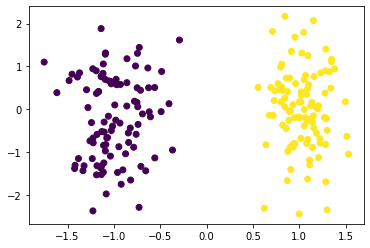

In [113]:
vis(train)

### Question 1:

By definition, if a data set is linearly separable, the Perceptron will find a separating hyperplane in a finite number of updates. Which is the case for our training data set, thus, the Perceptron algorithm converges.

### Question 2:

In [152]:
def plot_boundary(inputs,targets,weights):
    # fig config
    plt.figure(figsize=(10,6))
    plt.grid(True)
    scatter = plt.scatter(inputs[:,0],inputs[:,1],c=targets)
    for i in np.linspace(np.amin(inputs[:,:1]),np.amax(inputs[:,:1])):
        
        y = -((weights[0]/weights[1])*i)
        plt.plot(i, y,'gx')

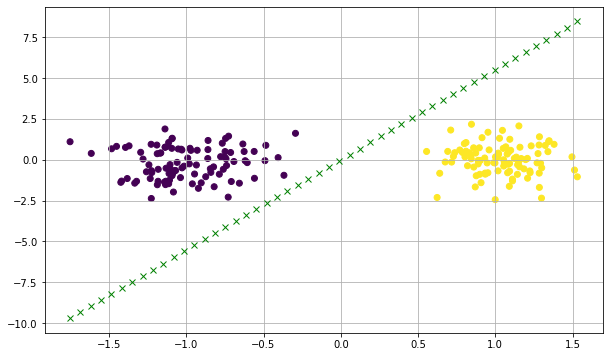

In [153]:
plot_boundary(train[:,:2],train[:,2],w)

The decision boundary is not unique, we can have an infinite solution in our case since it's depends from the initialisation of weights, we can try a different initalization to check it out.

### Question 3:

#### Prediction: 

In [154]:
def get_prediction(w, point):
    result = np.dot(w,point)
    if result <0:
        return -1
    else:
        return 1

In [155]:
prediction = []
for i in range(len(test)):
    prediction.append(get_prediction(w, test[i,:2]))

#### Accuracy: 

In [156]:
accuracy_score(prediction,test[:,2])

1.0

Plotting the boundary on the test set 

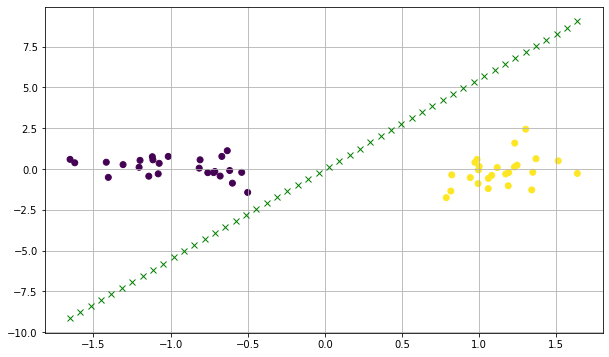

In [158]:
plot_boundary(test[:,:2],test[:,2],w)

### Experiment 2:  sigma1 = sigma2 = 0.75

In [159]:
w,train,test = gen_train_split(sigma1=0.75,sigma2=0.75)

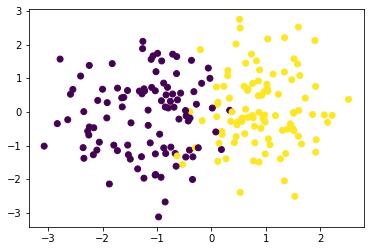

In [160]:
vis(train)

### Question 1:

In this second experiment, we can visually see that the dataset is not linearly separable, which is a convergion condition for the perceptron algorithm. Therefore, Perceptron will not converge in this experiment. 

### Question 2:

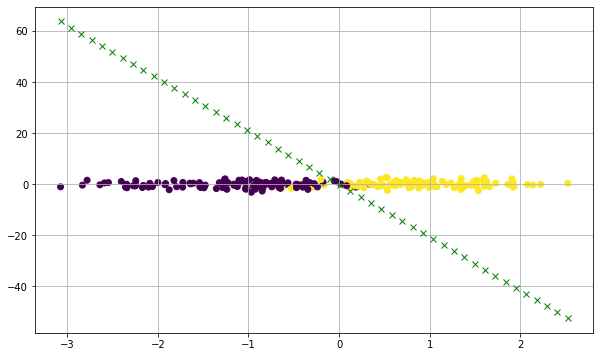

In [161]:
plot_boundary(train[:,:2],train[:,2],w)

Exactly like the previous experiment, the decision boundry isn't unique since it's dependant from the weights and its initialization. 

### Question 3:

In [162]:
prediction = []
for i in range(len(test)):
    prediction.append(get_prediction(w, test[i,:2]))

#### Accuracy: 

In [163]:
accuracy_score(prediction,test[:,2])

0.86

Plotting the boundary on the test set 

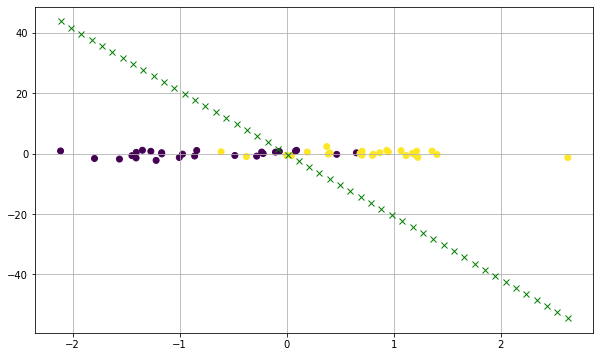

In [164]:
plot_boundary(test[:,:2],test[:,2],w)

### Done by: Ben Lazrek Khalifa, Khedher Mohamed Ali, Souid Cyrine 